# Predicting Customer Churn

**Credit:** http://blog.yhathq.com/posts/predicting-customer-churn-with-sklearn.html

We first import the required packages: Pandas for data processing.

In [2]:
import pandas as pd

We then import the Scikit-Learn package. In this demo, we will try 3 machine learning algorithms that are

1. *k*-Nearest Neigbors;
2. Naive Bayes;
3. Support Vector Machine.

In [3]:
from sklearn import neighbors, naive_bayes, svm

Moreover, we import the modules for evaluating the algorithms and proprocessing data.

In [4]:
from sklearn.metrics import accuracy_score, classification_report

## Preprocessing Data

We use Pandas to load the data from a CSV file.

In [5]:
churn_df = pd.read_csv('data/churn.csv')
churn_df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [7]:
churn_df[churn_df['Churn?'] == 'True.'].describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.00000,483.000000,483.000000,483.000000
mean,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.70000,4.163561,2.889545,2.229814
std,39.467820,42.792270,11.860138,68.997792,21.582307,11.729710,51.728910,19.724711,4.396762,47.132825,19.950659,2.121081,2.79319,2.551575,0.754152,1.853275
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,49.000000,2.130000,2.00000,1.000000,0.540000,0.000000
25%,76.000000,408.000000,0.000000,153.250000,87.500000,26.055000,177.100000,87.000000,15.055000,171.250000,85.000000,7.705000,8.80000,2.000000,2.380000,1.000000
50%,103.000000,415.000000,0.000000,217.600000,103.000000,36.990000,211.300000,101.000000,17.960000,204.800000,100.000000,9.220000,10.60000,4.000000,2.860000,2.000000
75%,127.000000,510.000000,0.000000,265.950000,116.500000,45.210000,249.450000,114.000000,21.205000,239.850000,115.000000,10.795000,12.80000,5.000000,3.460000,4.000000
max,225.000000,510.000000,48.000000,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,354.900000,158.000000,15.970000,20.00000,20.000000,5.400000,9.000000


In [8]:
churn_df[churn_df['Churn?'] == 'False.'].describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
std,39.882350,42.306156,13.913125,50.181655,19.801157,8.530835,50.292175,19.958414,4.274863,51.105032,19.506246,2.299768,2.784489,2.441984,0.751784,1.163883
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,142.825000,87.000000,24.282500,164.500000,87.000000,13.980000,165.900000,87.000000,7.470000,8.400000,3.000000,2.270000,1.000000
50%,100.000000,415.000000,0.000000,177.200000,100.000000,30.120000,199.600000,100.000000,16.970000,200.250000,100.000000,9.010000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,22.000000,210.300000,114.000000,35.750000,233.200000,114.000000,19.820000,234.900000,113.000000,10.570000,12.000000,6.000000,3.240000,2.000000
max,243.000000,510.000000,51.000000,315.600000,163.000000,53.650000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,18.900000,19.000000,5.100000,8.000000


In [9]:
import seaborn as sns

In [13]:
churn_df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [15]:
churn_df.columns = ['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan",
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'churn']

In [20]:
def convert(value):
    if value == 'True.':
        return 'yes'
    else:
        return 'no'

In [21]:
churn_df['preprocessed_churn'] = churn_df.churn.apply(convert)

In [22]:
churn_df.head(2)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,churn,preprocessed_churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.7,1,False.,no
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.7,1,False.,no


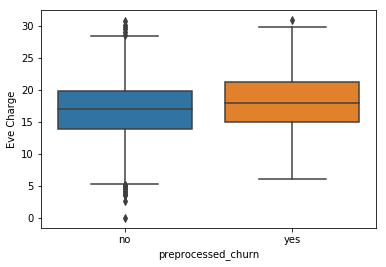

In [24]:
sns.boxplot(x='preprocessed_churn', y='Eve Charge', data=churn_df)

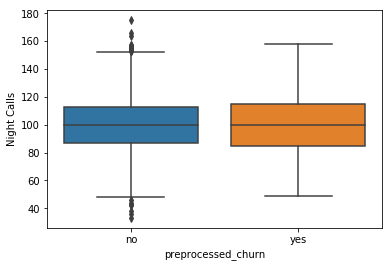

In [25]:
sns.boxplot(x='preprocessed_churn', y='Night Calls', data=churn_df)

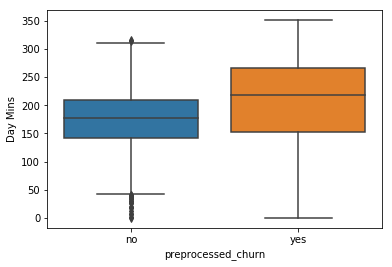

In [26]:
sns.boxplot(x='preprocessed_churn', y='Day Mins', data=churn_df)

In [ ]:
churn_df.info()

Separate the classification target from the data.

In [27]:
def convert_churn_into_yes_or_no(churn):
    if churn == 'True.':
        return 'yes'
    if churn == 'False.':
        return 'no'

In [29]:
churn_df['preprocessed_churn'] = churn_df['churn'].map(convert_churn_into_yes_or_no)

In [30]:
churn_df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,churn,preprocessed_churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,no
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,no
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,no
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,no
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,no


In [31]:
y = churn_df['preprocessed_churn']

Remove some unnecessary data.

In [32]:
to_drop = ['State', 'Area Code', 'Phone', 'churn', 'preprocessed_churn']
churn_feature_space = churn_df.drop(to_drop, axis=1)

Since some columns contain 'yes' or 'no' data, we should convert them into boolean and then into floating point. This will make it easier for processing later.

In [33]:
churn_feature_space.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [34]:
def convert_to_float(value):
    if value == 'yes':
        return 1.0
    else:
        return 0.0

In [35]:
churn_feature_space["Int'l Plan"] = churn_feature_space["Int'l Plan"].map(convert_to_float)

In [36]:
churn_feature_space['VMail Plan'] = churn_feature_space['VMail Plan'].map(convert_to_float)

In [37]:
churn_feature_space.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [38]:
X = churn_feature_space

It is important to normalize the data in building a machine learning model. The data will be in the same range and it can improve the results.

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

print('Feature space holds %d observations and %d features' % X.shape)
print('Unique targets:', y.unique())

Feature space holds 3333 observations and 17 features
Unique targets: ['no' 'yes']


In [50]:
X

array([[ 0.67648946, -0.32758048,  1.6170861 , ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.14906505, -0.32758048,  1.6170861 , ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.9025285 , -0.32758048, -0.61839626, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [-1.83505538, -0.32758048, -0.61839626, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [ 2.08295458,  3.05268496, -0.61839626, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [-0.67974475, -0.32758048,  1.6170861 , ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

## Preparing Training and Testing Data

Prepare the training and testing data.

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

## Building Predictive Model

Define the target for data visualization later.

In [52]:
target_names = ['yes', 'no']

### k-Nearest Neighbors

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [55]:
knn = neighbors.KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8959479739869936
{'n_neighbors': 7}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')


In [56]:
# n_neighbors = 7

# knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
# knn.fit(X_train, y_train)

# y_pred = knn.predict(X_test)

y_pred = grid.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

0.8883058470764618
             precision    recall  f1-score   support

        yes       0.90      0.99      0.94      1148
         no       0.76      0.29      0.42       186

avg / total       0.88      0.89      0.87      1334



### Naive Bayes

In [ ]:
gnb = naive_bayes.GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

### Support Vector Machines (SVMs)

In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))